# Support Vector Machine

Support Vector Machine (SVM) A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

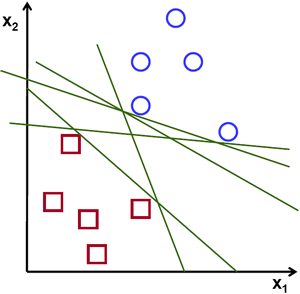

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

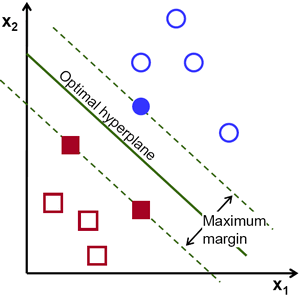

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

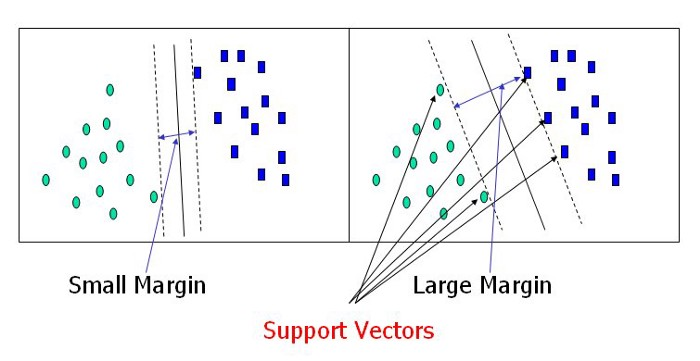

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Digits loading

In [3]:
digits = datasets.load_digits()
#print(digits)
image_and_labels = list(zip(digits.images, digits.target))

In [4]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## Flattening the images
To apply a classifier on this data, we need to flatten the images to turn the data into (samples, features) matrix.

In [7]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## Training the Model
We are using SVM model as imported from sklearn library and then it's being trained on 75% of the digits

In [10]:
trainTestSplit = int(n_samples*0.75)

model = svm.SVC()
model.fit(data[:trainTestSplit], digits.target[:trainTestSplit])

target = digits.target[trainTestSplit:]
predictions = model.predict(data[trainTestSplit:])

In [11]:
print(confusion_matrix(target, predictions))
print(accuracy_score(target, predictions))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  2  0  2  6  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 44  1  0]
 [ 0  2  0  0  0  0  0  0 38  1]
 [ 0  0  0  1  0  1  0  1  1 41]]
0.9488888888888889


<AxesSubplot:>

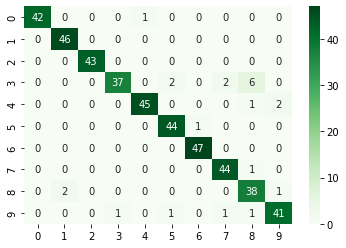

In [12]:
import seaborn as sns
sns.heatmap(confusion_matrix(target, predictions), annot=True, cmap='Greens')

## Prediction

Prediction:  [4]


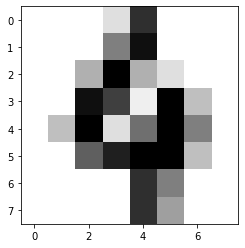

In [16]:
plt.imshow(digits.images[100], cmap=plt.cm.gray_r, interpolation='nearest')
print('Prediction: ', model.predict(data[100].reshape(1, -1)))

plt.show()